Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

# Import the CSV files into DataFrames
df = pd.read_csv('df_city_bike.csv')
df_foursquare = pd.read_csv('df_foursquare.csv')
df_yelp = pd.read_csv('df_yelp.csv')


In [2]:
df_yelp = df_yelp.rename(columns={'Latitude': 'Yelp_Latitude', 'Longitude': 'Yelp_Longitude'})
df_foursquare = df_foursquare.rename(columns={'Latitude': 'Foursquare_Latitude', 'Longitude': 'Foursquare_Longitude'})


In [3]:
df_merged = df.merge(df_foursquare, on=['latitude', 'longitude'], how='left')
df_merged = df_merged.merge(df_yelp, left_on=['latitude', 'longitude'], right_on=['Yelp_Latitude', 'Yelp_Longitude'], how='left')
df_merged.head(5)


name_x  empty_slots  free_bikes   latitude  longitude  \
0  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   
1  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   
2  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   
3  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   
4  56 - CLN 110 W1 Norte            7           4 -15.758862  -47.88882   

                     fsq_id               name_y  rating  \
0  4cfe88e1084f548186099109  Torteria Di Lorenza     6.6   
1  4cfe88e1084f548186099109  Torteria Di Lorenza     6.6   
2  4cfe88e1084f548186099109  Torteria Di Lorenza     6.6   
3  4cfe88e1084f548186099109  Torteria Di Lorenza     6.6   
4  4cfe88e1084f548186099109  Torteria Di Lorenza     6.6   

                               categories  \
0  ['Café', 'Dessert Shop', 'Restaurant']   
1  ['Café', 'Dessert Shop', 'Restaurant']   
2  ['Café', 'Dessert Shop', 'Restaurant']   
3  ['Café', 'Dessert Shop', 'Restaurant']   
4  ['Café', 'Dessert Shop', 'Restaurant']   

                                  address                         Name  \
0  CLN 109 Bl. C, Brasília, DF, 70752-530  Feitiço Mineiro Restaurante   
1  CLN 109 Bl. C, Brasília, DF, 70752-530                          BFC   
2  CLN 109 Bl. C, Brasília, DF, 70752-530            Maori Gastronomia   
3  CLN 109 Bl. C, Brasília, DF, 70752-530                  Sushi Woman   
4  CLN 109 Bl. C, Brasília, DF, 70752-530      Mucho Gusto Gastronomia   

   Rating                  Address      City State   ZIP Code  Yelp_Latitude  \
0     4.5   CLN 306 BL D  lj 45/51  Brasília    DF  70745-540     -15.758862   
1     4.0  Cln 110 BLOCO B LOJA 62      Shcn    DF        NaN     -15.758862   
2     4.5                 CLN, 110  Brasília    DF  70753-000     -15.758862   
3     4.0      CLN 109 BL A  lj 20  Brasília    DF  70752-510     -15.758862   
4     4.5      CLN 309 BL A  lj 20  Brasília    DF  70755-510     -15.758862   

   Yelp_Longitude  
0       -47.88882  
1       -47.88882  
2       -47.88882  
3       -47.88882  
4       -47.88882

In [4]:
print(df_merged.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7795 entries, 0 to 7794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_x          7795 non-null   object 
 1   empty_slots     7795 non-null   int64  
 2   free_bikes      7795 non-null   int64  
 3   latitude        7795 non-null   float64
 4   longitude       7795 non-null   float64
 5   fsq_id          7754 non-null   object 
 6   name_y          7754 non-null   object 
 7   rating          7368 non-null   float64
 8   categories      7754 non-null   object 
 9   address         7754 non-null   object 
 10  Name            7795 non-null   object 
 11  Rating          7795 non-null   float64
 12  Address         7783 non-null   object 
 13  City            7795 non-null   object 
 14  State           7795 non-null   object 
 15  ZIP Code        6979 non-null   object 
 16  Yelp_Latitude   7795 non-null   float64
 17  Yelp_Longitude  7795 non-null   f

In [5]:
print(df_merged.describe())

       empty_slots   free_bikes     latitude    longitude       rating  \
count  7795.000000  7795.000000  7795.000000  7795.000000  7368.000000   
mean      7.702245     4.659654   -15.785951   -47.889357     7.598371   
std       3.585459     3.606940     0.020842     0.012783     0.736467   
min       0.000000     0.000000   -15.820776   -47.926690     5.600000   
25%       5.000000     2.000000   -15.803620   -47.894000     7.100000   
50%       7.000000     4.000000   -15.791100   -47.886460     7.600000   
75%      10.000000     7.000000   -15.769290   -47.882230     8.100000   
max      23.000000    19.000000   -15.743100   -47.858400     9.100000   

            Rating  Yelp_Latitude  Yelp_Longitude  
count  7795.000000    7795.000000     7795.000000  
mean      4.183900     -15.785951      -47.889357  
std       0.465741       0.020842        0.012783  
min       2.000000     -15.820776      -47.926690  
25%       4.000000     -15.803620      -47.894000  
50%       4.000000   

In [37]:
# Export to CSV
df_merged.to_csv('df_merged.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

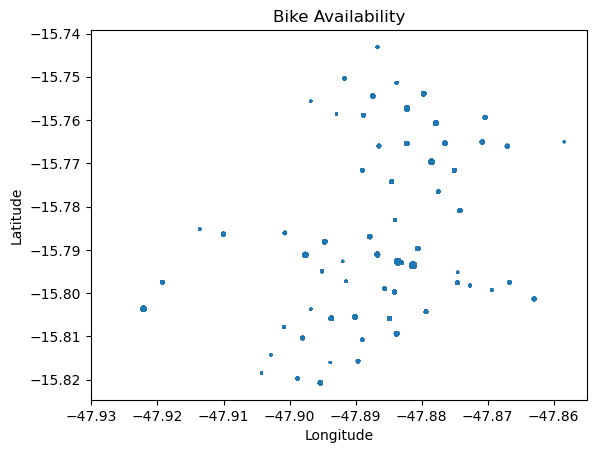

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['longitude'], df_merged['latitude'], s=df_merged['free_bikes'], alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bike Availability')
plt.show()


In [26]:
import folium

# Brasília Center Coordinates (latitude and longitude)
latitude_center = -15.7942
longitude_center = -47.8822

# Define map size
map_width = 1000  # in pixels
map_height = 800  # in pixels

# Create the map with OpenStreetMap tiles
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12, tiles='OpenStreetMap', width=map_width, height=map_height)

# Add markers for points of interest
for index, row in df_merged.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=row['free_bikes'] / 10,  # Adjust the circle size proportionally
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.7).add_to(m)

# Display the map
m


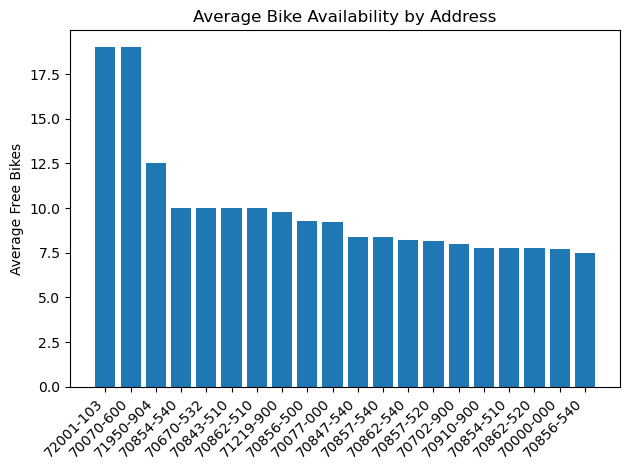

In [24]:
mean_free_bikes = df_merged.groupby('ZIP Code')['free_bikes'].mean().sort_values(ascending=False)


subset_addresses = mean_free_bikes[:20]  

plt.figure()  

plt.bar(subset_addresses.index, subset_addresses)
plt.xticks(rotation=45, ha='right')  # 
plt.ylabel('Average Free Bikes')
plt.title('Average Bike Availability by Address')

plt.tight_layout()  
plt.show()


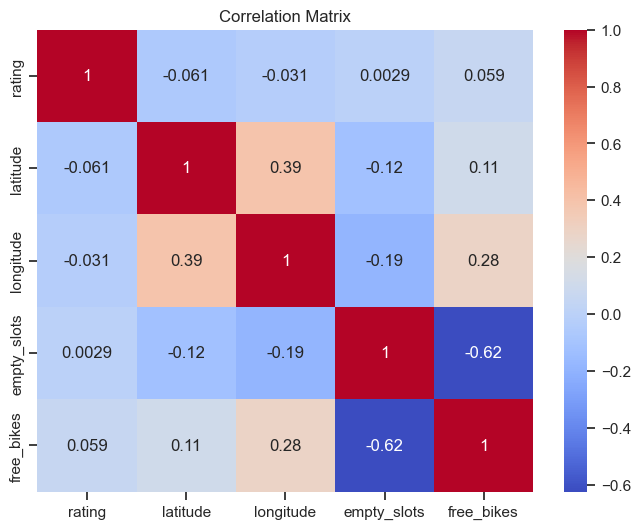

In [19]:
import seaborn as sns

# Select numerical columns for correlation matrix
numerical_cols = ['rating', 'latitude', 'longitude', 'empty_slots', 'free_bikes']

# Calculate correlation matrix
corr_matrix = df_merged[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


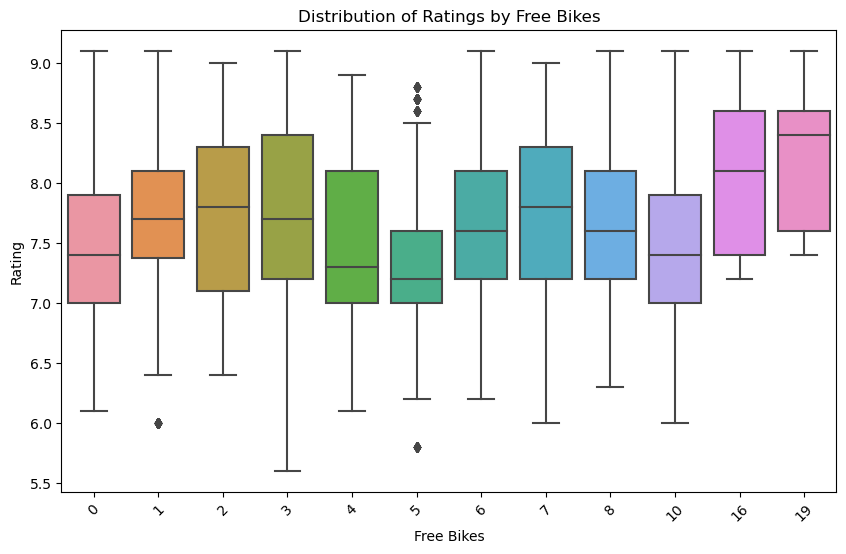

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='free_bikes', y='rating', data=df_merged)
plt.title('Distribution of Ratings by Free Bikes')
plt.xlabel('Free Bikes')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


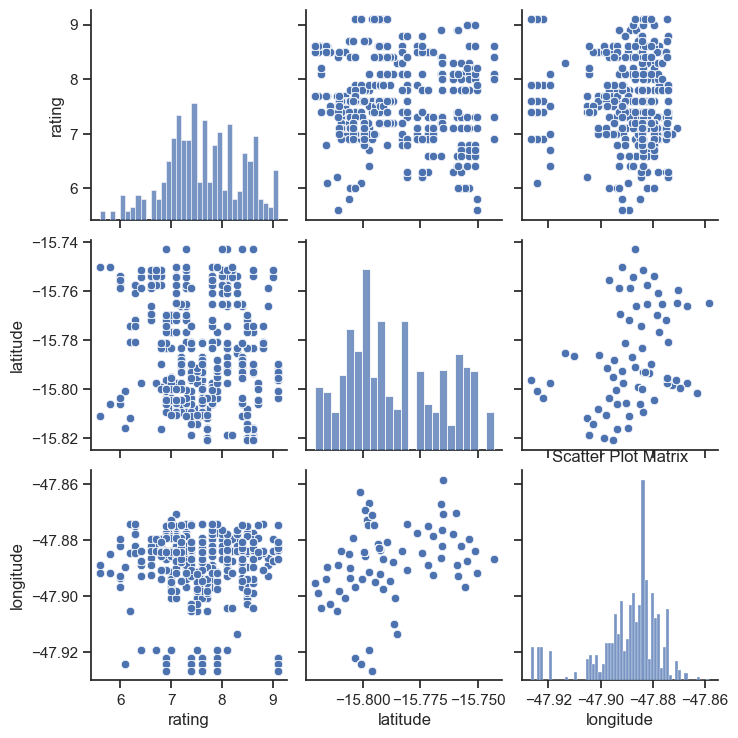

In [16]:
sns.set(style='ticks')
sns.pairplot(df_merged[['rating', 'latitude', 'longitude']])
plt.title('Scatter Plot Matrix')
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
df_yelp = df_yelp.rename(columns={'Latitude': 'Yelp_Latitude', 'Longitude': 'Yelp_Longitude'})
df_foursquare = df_foursquare.rename(columns={'Latitude': 'Foursquare_Latitude', 'Longitude': 'Foursquare_Longitude'})


In [44]:
import sqlite3

# Drop the duplicate columns
df_merged = df_merged.drop(['name_y', 'rating', 'categories', 'address', 'Name', 'Address'], axis=1)

# Create a connection to the SQLite database
conn = sqlite3.connect('my_database.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Convert the DataFrame to a SQLite table
df_merged.to_sql('poi_data', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()


Look at the data before and after the join to validate your data.